<a href="https://colab.research.google.com/github/Neeshi14/Create-CNN-model/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply the CNN model

Import the mnist dataset form keras .



Import the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


X_train: Training images (60,000 images of shape 28x28)


Y_train: Training labels (60,000 labels corresponding to the images)


X_test: Test images (10,000 images of shape 28x28)


Y_test: Test labels (10,000 labels corresponding to the images)


In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [ ]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
#this add the fully connected layer with 128 neurons
#these is 2 hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 445,770 (1.70 MB)

 Trainable params: 445,770 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model fitting
history = model.fit(X_train, Y_train,epochs=5,batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.8806 - loss: 0.3750 - val_accuracy: 0.9823 - val_loss: 0.0574
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9831 - loss: 0.0558 - val_accuracy: 0.9885 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.9893 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9908 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9926 - val_loss: 0.0277


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print('Training accuracy:', accuracy)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Testing accuracy:', accuracy)

Training accuracy: 0.9973499774932861
Testing accuracy: 0.9926000237464905


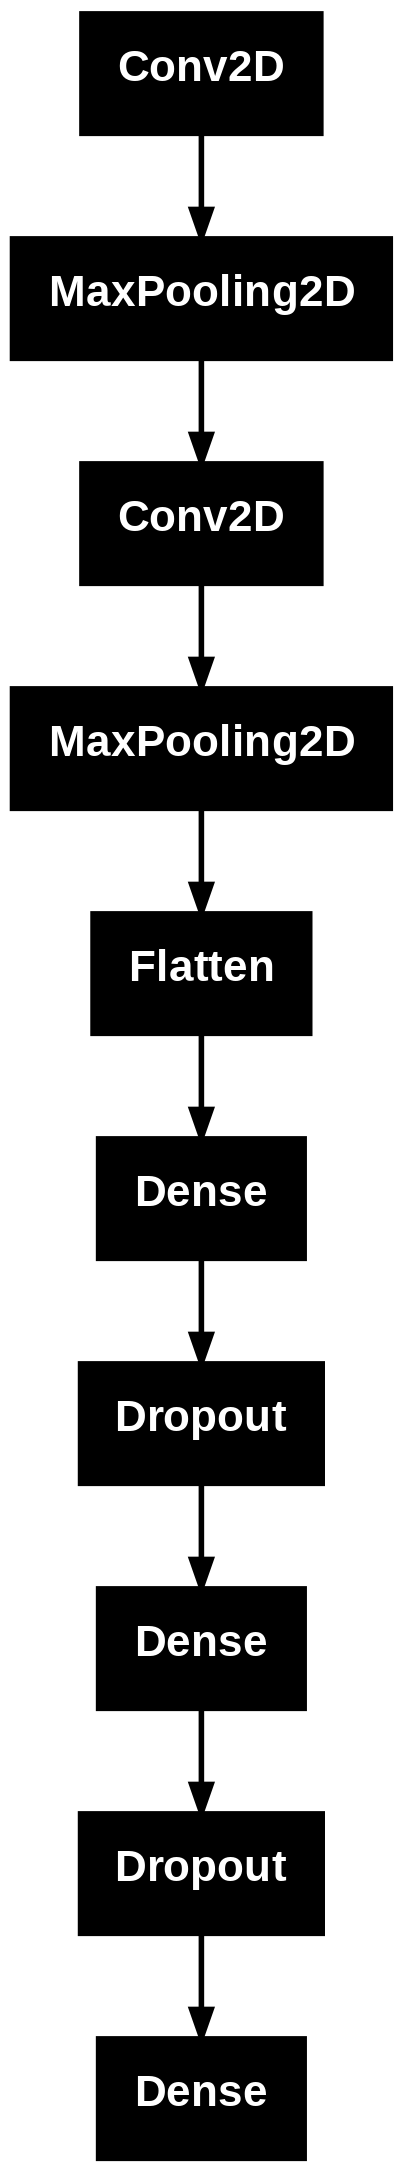

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
predictions = model.predict(X_test)# Predict on the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)#Convert predictions to class labels

In [ ]:
Y_test_max = np.argmax(Y_test, axis=1)# test data convert to class labels

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test_max, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.9926


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


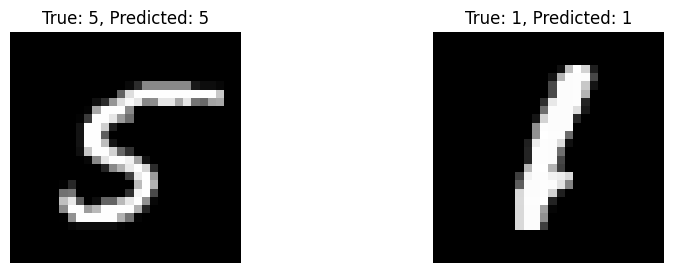

In [ ]:
import matplotlib.pyplot as plt

# Select a no of images from the test set
num_images = 2
random_indices = np.random.choice(X_test.shape[0], size=num_images, replace=False)
images = X_test[random_indices]
true_labels = np.argmax(Y_test[random_indices], axis=1)
predicted_labels = np.argmax(model.predict(images), axis=1)

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    ax.axis('off')
plt.show()